# Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/home/pranjal/.local/share/virtualenvs/crime-analysis-report-pk3Cf-oK/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Algorithm Psuedocode:

1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d).
6. Construct a projection matrix W from the “top” k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.


In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components_ = n_components
        self.components = None
        self.eign_vals = None
        self.eign_vectors = None
    
    def fit(self, X):
        cov_mat = np.cov(X.T)
        eigen_vals, eigen_vectors = scipy.linalg.eigh(cov_mat)
        
        eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vectors[:, i]) 
                       for i in range(len(eigen_vals))]
        eigen_pairs.sort(key=lambda k: k[0], reverse=True)
        
        
        sorted_values = []
        sorted_vectors = []
        
        for i, j in eigen_pairs:
            sorted_values.append(i)
            sorted_vectors.append(j)
    
    
        self.eign_vals = sorted_values
        self.eign_vectors = sorted_vectors
        self.components = sorted_vectors[: self.n_components_]
    
    def transform(self, X):
        return np.matmul(self.components,
                         X.T).T

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(-X)

    
    @property
    def explained_variance_ratio(self):
        return self.eign_vals/np.sum(self.eign_vals)
    
    @property
    def explained_variance_ratio_cumsum(self):
        return np.cumsum(self.explained_variance_ratio)
    
    @classmethod
    def plot_variance_ratio_curve(cls, X):
        _, n_features = X.shape
        
        obj_ = PCA(n_components=n_features)
        obj_.fit(X)
        
        plt.bar(range(1, obj_.n_components_ + 1),
                obj_.explained_variance_ratio,
                align='center', 
                color= 'black',
                label='individual explained variance')
        
        plt.step(range(1, obj_.n_components_ + 1),
                 obj_.explained_variance_ratio_cumsum,
                 where='mid',
                 label='cumulative explained variance',
                 color='r')
        
        plt.title('PCA Explained variance ratio')
        plt.ylabel('Ratio')
        plt.xlabel('Principal component index')
        plt.legend(loc='best')
        plt.show()


In [3]:
X = pd.read_pickle('state_clubbed_df.pickle')
X

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,35.0,84.0,0.0,57.0,7.0,22.0,12.0,0.0,6.0,47.0,270.0
1,arunachal pradesh,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,assam,2001,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
3,bihar,2001,2.0,16.0,0.0,26.0,0.0,1.0,16.0,1.0,2.0,18.0,83.0
4,chhattisgarh,2001,14.0,150.0,5.0,46.0,1.0,15.0,0.0,0.0,0.0,354.0,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,2.0,2.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,2.0,35.0
523,daman & diu,2015,1.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
524,delhi,2015,54.0,927.0,3.0,6881.0,0.0,23.0,0.0,6.0,0.0,231.0,9489.0
525,lakshadweep,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [4]:
all_headers = X.columns
all_headers

Index(['state', 'year', 'murder', 'rape', 'foeticide',
       'kidnapping and abduction', 'abetment of suicide',
       'exposure and abandonment', 'procuration of minor girls',
       'selling girls for prostitution', 'prohibition of child marriage act',
       'other crimes', 'total'],
      dtype='object')

In [5]:
cols_to_norm = all_headers[2:-1]
print (cols_to_norm)

Index(['murder', 'rape', 'foeticide', 'kidnapping and abduction',
       'abetment of suicide', 'exposure and abandonment',
       'procuration of minor girls', 'selling girls for prostitution',
       'prohibition of child marriage act', 'other crimes'],
      dtype='object')


In [6]:
X[cols_to_norm] = StandardScaler().fit_transform(X[cols_to_norm])
X

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,-0.088951,-0.293383,-0.422895,-0.331227,0.899853,-0.024876,-0.085015,-0.183679,0.287960,-0.288916,270.0
1,arunachal pradesh,2001,-0.518114,-0.556170,-0.422895,-0.391738,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,0.0
2,assam,2001,-0.518114,-0.556170,-0.422895,-0.372629,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,18.0
3,bihar,2001,-0.493590,-0.506115,-0.422895,-0.364137,-0.281905,-0.417052,-0.041155,-0.092531,-0.198824,-0.349356,83.0
4,chhattisgarh,2001,-0.346449,-0.086907,0.247176,-0.342905,-0.113082,-0.155602,-0.216594,-0.183679,-0.442216,0.350914,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,-0.493590,-0.549913,-0.422895,-0.376876,-0.281905,-0.398377,-0.216594,-0.183679,-0.442216,-0.382702,35.0
523,daman & diu,2015,-0.505852,-0.556170,-0.422895,-0.369445,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,28.0
524,delhi,2015,0.144024,2.343874,-0.020852,6.913125,-0.281905,-0.006201,-0.216594,0.363206,-0.442216,0.094565,9489.0
525,lakshadweep,2015,-0.518114,-0.556170,-0.422895,-0.391738,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.384786,2.0


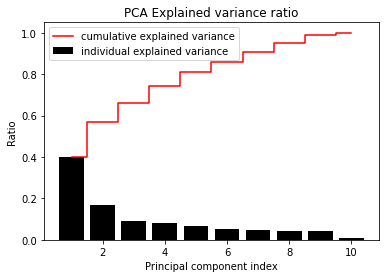

In [7]:
PCA.plot_variance_ratio_curve(X[cols_to_norm].to_numpy())

In [8]:
pca = PCA(2)
pca.fit_transform(X[cols_to_norm].to_numpy())

array([[-0.22857822,  0.05040634],
       [-1.2305782 , -0.23792131],
       [-1.22410618, -0.23655953],
       ...,
       [ 3.33125619,  0.16015379],
       [-1.22973465, -0.2381791 ],
       [-1.22709332, -0.23805862]])